# Testing re-orientation in shearflow.

The result should match Figure 2 in
Favaloro, A.J., Tucker III, C.L.: "Analysis of anisotropic diffusion models for fiber
orientation", Composites Part A, 126 (2019):
DOI: 10.1016/j.compositesa.2019.105605

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from fiberoripy.orientation import (
    ard_rsc_ode,
    folgar_tucker_ode,
    iard_ode,
    mrd_ode,
    pard_ode,
)

In [14]:
# geometric factor
xi = 1.0

# time steps
t = np.linspace(0, 80, 100)

# initial fiber orientation state
A0 = 1.0 / 3.0 * np.eye(3)

In [15]:
# define a function that describes the (time-dependend) velocity gradient
def L(t):
    """Velocity gradient."""
    return np.array([[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

In [16]:
# compute solutions by integrating the ODEs
A_ft = odeint(folgar_tucker_ode, A0.ravel(), t, args=(xi, L, 0.0311),)
A_iard = odeint(iard_ode, A0.ravel(), t, args=(xi, L, 0.0562, 0.9977),)
A_pard = odeint(pard_ode, A0.ravel(), t, args=(xi, L, 0.0169, 0.9868),)
A_mrd = odeint(mrd_ode, A0.ravel(), t, args=(xi, L, 0.0198, 1.0, 0.4796, 0.0120),)
A_wpt = odeint(ard_rsc_ode, A0.ravel(), t, args=(xi, L, 0.0504 * (1.0 - 0.995), 1.0, 0.0, 0.0504 * 0.995, 0.0, 0.0),)
A_pt = odeint(ard_rsc_ode, A0.ravel(), t, args=(xi, L, 1.924e-4, 1.0, 5.839e-3, 0.04, 1.168e-5, 0.0),)

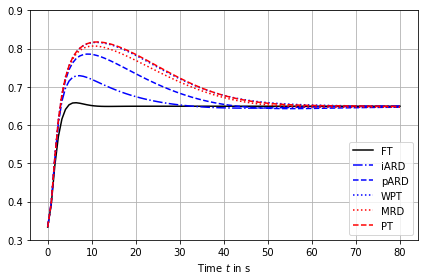

In [17]:
# plot components
plt.plot(t, A_ft[:, 0], "k-", label="FT")
plt.plot(t, A_iard[:, 0], "b-.", label="iARD")
plt.plot(t, A_pard[:, 0], "b--", label="pARD")
plt.plot(t, A_wpt[:, 0], "b:", label="WPT")
plt.plot(t, A_mrd[:, 0], "r:", label="MRD")
plt.plot(t, A_pt[:, 0], "r--", label="PT")

# adjust some plot settings.
plt.xlabel("Time $t$ in s")
plt.ylim([0.3, 0.9])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()